In [1]:
import torch
from collections import defaultdict
import csv
import numpy
import random
import matplotlib.pyplot as plt
import math


In [2]:
print(torch.__version__)

1.1.0


In [3]:
def readCSV(path):
  f = open(path, 'rt')
  f.readline()
  for l in f:
    yield l.strip().split(',')
    
def parseData(fname):
  for l in open(fname):
    yield eval(l)

def parseDataFromURL(fname):
  for l in urlopen(fname):
    yield eval(l)

In [4]:
print("Reading data...")
# data = list(parseDataFromURL("http://jmcauley.ucsd.edu/cse255/data/beer/beer_50000.json"))
# Save the file to disk first...
place_data = list(parseData("../datasets/google_local/places.clean.json"))
print("done")

place_data[:2]

Reading data...
done


[{'address': ['2615 Angler Ave', 'Hemet, CA 92545'],
  'closed': False,
  'gPlusPlaceId': '104699454385822125632',
  'gps': [33.703804, -117.003209],
  'hours': [['Monday', [['6:30 am--4:15 pm']]],
   ['Tuesday', [['6:30 am--4:15 pm']]],
   ['Wednesday', [['6:30 am--4:15 pm']], 1],
   ['Thursday', [['6:30 am--4:15 pm']]],
   ['Friday', [['6:30 am--4:15 pm']]],
   ['Saturday', [['6:30 am--4:15 pm']]],
   ['Sunday', [['6:30 am--4:15 pm']]]],
  'name': 'Diamond Valley Lake Marina',
  'phone': '(951) 926-7201',
  'price': None},
 {'address': ['Parole', 'Annapolis, MD'],
  'closed': False,
  'gPlusPlaceId': '103054478949000078829',
  'gps': [38.979759, -76.547538],
  'hours': None,
  'name': 'Blue Ribbon Cleaners',
  'phone': '(410) 266-6123',
  'price': None}]

In [5]:
print("Reading data...")
# data = list(parseDataFromURL("http://jmcauley.ucsd.edu/cse255/data/beer/beer_50000.json"))
# Save the file to disk first...
user_data = list(parseData("../datasets/google_local/users.clean.json"))
print("done")

user_data[:10]

Reading data...
done


[{'currentPlace': ['Thành phố Hồ Chí Minh, Việt Nam',
   [[], 108230990, 1066296640, 1]],
  'education': [[[], [], [], [], [], 6],
   [['Đại học Kiến trúc tp Hồ chí minh, Việt nam',
     'KS.XD',
     [[], [1, 1, 2013], 1],
     '',
     '']]],
  'gPlusUserId': '100000010817154263736',
  'jobs': [['Tổng công ty IDICO',
    'Chuyên viên Kỹ thuật XD',
    [[1, 1, 1998], [1, 1, 2013], 1],
    '',
    '']],
  'previousPlaces': [['tp. Nam Định, Nam Định, Việt Nam',
    [[], 204200000, 1061683330, 1]]],
  'userName': 'an lam'},
 {'currentPlace': ['Adana', [[], 370000000, 353213330, 1]],
  'education': [[[], [], [], [], [], 6],
   [['Anadolu University',
     '',
     [[], [1, 1, 2001]],
     'http://www.freebase.com/view/m/064f68',
     '']]],
  'gPlusUserId': '100000013500285534661',
  'jobs': [['Mustafa Nevzat İlaç San. A.Ş.', 'Rebrezant', [], '', '']],
  'previousPlaces': None,
  'userName': 'HALİL TURGUT'},
 {'currentPlace': None,
  'education': [[[], [], [], [], [], 6], []],
  'gPlusUse

In [6]:
print("Reading data...")
# data = list(parseDataFromURL("http://jmcauley.ucsd.edu/cse255/data/beer/beer_50000.json"))
# Save the file to disk first...
review_data = list(parseData("../datasets/google_local/reviews.clean.json"))
print("done")

review_data[:5]

Reading data...
done


[{'categories': ['Giải Trí - Café'],
  'gPlusPlaceId': '108103314380004200232',
  'gPlusUserId': '100000010817154263736',
  'rating': 3.0,
  'reviewText': 'Chất lượng tạm ổn',
  'reviewTime': 'Jul 1, 2013',
  'reviewerName': 'an lam',
  'unixReviewTime': 1372686659},
 {'categories': ['Turkish Cuisine'],
  'gPlusPlaceId': '102194128241608748649',
  'gPlusUserId': '100000013500285534661',
  'rating': 5.0,
  'reviewText': 'Wc si temiz duzenli..',
  'reviewTime': 'Jul 21, 2012',
  'reviewerName': 'HALİL TURGUT',
  'unixReviewTime': 1342870724},
 {'categories': ['Fishing', 'Pond Fish Supplier', 'Seafood Market'],
  'gPlusPlaceId': '101409858828175402384',
  'gPlusUserId': '100000021336848867366',
  'rating': 5.0,
  'reviewText': '何回も私は予定に休みがセルバに行ったので覚えて見て、分かります❗',
  'reviewTime': 'Jan 25, 2014',
  'reviewerName': '森田さとこ',
  'unixReviewTime': 1390653513},
 {'categories': ['Museum'],
  'gPlusPlaceId': '101477177500158511502',
  'gPlusUserId': '100000021336848867366',
  'rating': 5.0,
  'revie

In [7]:
placeCount = defaultdict(int)
userCount = defaultdict(int)
totalRatings = 0
review_times=[]

reviews = [(review['gPlusPlaceId'],review['gPlusUserId'],review['rating'],\
            review['unixReviewTime']) for review in review_data] 

for place,user,rating,time in reviews:
  placeCount[place] += 1
  userCount[user] += 1
  review_times.append(time)  
  totalRatings += 1

In [8]:
mostPopular = [(placeCount[x], x) for x in placeCount]
mostPopular.sort()
mostPopular.reverse()

len(mostPopular)

3116785

In [54]:
morePopular=[]

for count,id in mostPopular:
    if count > 5:
        morePopular.append([int(count),id])

len(morePopular)

492554

<function matplotlib.pyplot.show>

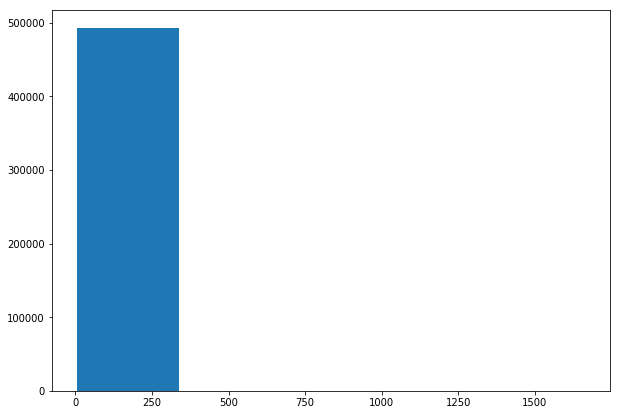

In [60]:
place_counts = numpy.array(morePopular)
counts = place_counts.T[0].astype(int)

plt.figure(figsize=(10,7))
plt.hist(counts, bins=5)
plt.show

In [58]:
place_counts.T[0].astype(int)

array([1662,  982,  790, ...,    6,    6,    6])

/home/lukeai/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


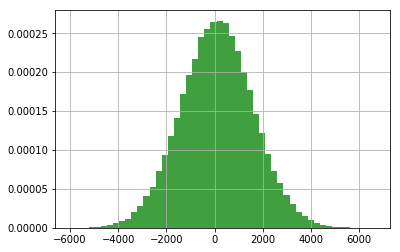

In [52]:
mu, sigma = 100, 1500
x = mu + sigma*numpy.random.randn(100000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)
plt.grid(True)

plt.show()

In [53]:
x

array([ 1899.66744221,  1980.39315162,   509.37230882, ...,
        2542.81912809, -1008.19833026, -1194.10521235])